<img src="https://github.com/LucaScaldaferri/Curso_Cientista_de_Dados/blob/main/logo_ebac.png?raw=true" alt="ebac-logo">


---

# **Profissão Cientista de Dados**
## **Módulo** 6 | Descritiva I | Exercício 3
Resolução Caderno de **Exercícios**<br> 
Aluno [Lucas Scaldaferri Magalhães Freitas](https://www.linkedin.com/in/0scaldaferri-lucas/) <br>

---

# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sinasc_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [18]:
df.loc[df['APGAR5'] <= 3, 'CAT_APGAR5'] = 'asfixia grave'
df.loc[(df['APGAR5'] >= 4) & (df['APGAR5'] <=5), 'CAT_APGAR5'] = 'asfixia moderada'
df.loc[(df['APGAR5'] >= 6) & (df['APGAR5'] <=7), 'CAT_APGAR5'] = 'asfixia leve'
df.loc[df['APGAR5'] > 8, 'CAT_APGAR5'] = 'normal'
df[['APGAR5', 'CAT_APGAR5']].head()

,APGAR5,CAT_APGAR5
0,10.0,normal
1,9.0,normal
2,10.0,normal
3,10.0,normal
4,10.0,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [19]:
df[['APGAR5', 'SEXO', 'GESTACAO']]

,APGAR5,SEXO,GESTACAO
0,10.0,Masculino,37 a 41 semanas
1,9.0,Feminino,37 a 41 semanas
2,10.0,Feminino,37 a 41 semanas
3,10.0,Feminino,37 a 41 semanas
4,10.0,Feminino,37 a 41 semanas
...,...,...,...
27023,9.0,Masculino,32 a 36 semanas
27024,9.0,Masculino,37 a 41 semanas
27025,10.0,Masculino,37 a 41 semanas
27026,9.0,Masculino,32 a 36 semanas


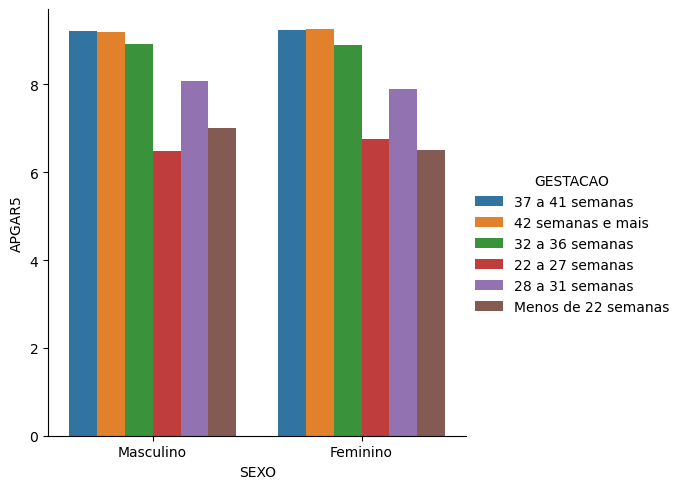

In [32]:
sns.catplot(x = 'SEXO', y = 'APGAR5', hue = 'GESTACAO', data = df, kind = 'bar', errorbar = None)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [35]:
freq = pd.crosstab(df['GESTACAO'], df['APGAR5'])
freq

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [36]:
freq_pct = freq.div(freq.sum(axis = 1), axis = 0)
freq_pct

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

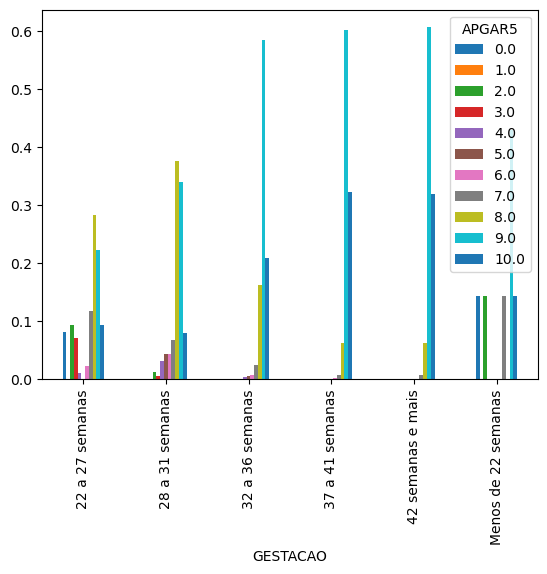

In [37]:
freq_pct.plot.bar()
# O gráfico ficou dificil de visualizar por apresentar muitas informações, sendo assim, será alterado a variável APGAR5 por CAT_APGAR5.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Menos de 22 semanas'),
  Text(1, 0, '22 a 27 semanas'),
  Text(2, 0, '28 a 31 semanas'),
  Text(3, 0, '32 a 36 semanas'),
  Text(4, 0, '37 a 41 semanas'),
  Text(5, 0, '42 semanas e mais')])

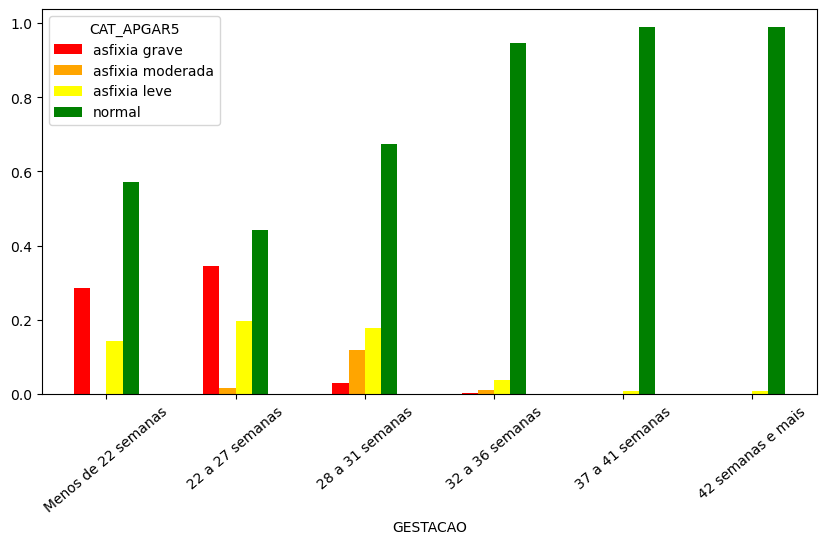

In [46]:
freq = pd.crosstab(df['GESTACAO'], df['CAT_APGAR5'])
freq = freq.reindex(
    index=['Menos de 22 semanas', 
           '22 a 27 semanas', 
           '28 a 31 semanas', 
           '32 a 36 semanas', 
           '37 a 41 semanas', 
           '42 semanas e mais'], 
    columns=['asfixia grave', 
             'asfixia moderada', 
             'asfixia leve', 
             'normal'])

freq_pct = freq.div(freq.sum(axis = 1), axis = 0)

plt.rc('figure', figsize=(10,5))
freq_pct.plot.bar(color=['red', 'orange', 'yellow', 'green'])
plt.xticks(rotation=40)

Através dos dados, é possível analisar no gráfico que conforme o decorrer do tempo e quanto mais próximo de 42 semanas, o risco de asfixia torna-se cada vez menor, ou seja, como o risco de asfixia moderada a grave torna-se quase nulo para bebês com nascimento acima de 36 semanas, o conjunto de dados corrobora para a classificação dos médicos.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5', ylabel='PESO'>

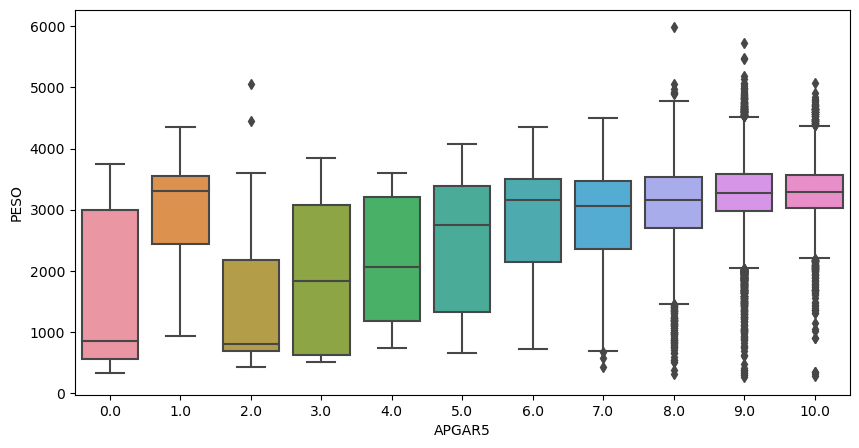

In [50]:
sns.boxplot(x='APGAR5', y='PESO', data = df)


Novamente, através dos dados, é possível analisar no gráfico que quanto menor o peso do bebê maior a possibilidade de risco. Também, APGAR5 entre 9 e 10 possuem menos variação de peso.